In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

print(breast_cancer_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
class ELM:

    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.W = np.random.randn(self.input_dim, self.hidden_dim)
        self.b = np.random.randn(self.hidden_dim)
        self.beta = None
        self.activation = lambda x: 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        H = self.activation(np.dot(X, self.W) + self.b)
        self.beta = np.dot(pinv(H), y)

    def predict(self, X):
        H = self.activation(np.dot(X, self.W) + self.b)
        output = np.dot(H, self.beta)
        print("Output shape:", output.shape)
        return (output > 0.5).astype(int)

In [4]:
X = breast_cancer_df.drop('target', axis=1)
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
y = breast_cancer_df['target']

In [5]:
import random

accuracy_results = {}

for j in range(1, 61):
    for i in range(0, 10):

        random_int = random.randint(1, 100)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_int)
        elm = ELM(30, j*5, 1)
        elm.fit(X_train, y_train)
        y_pred = elm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[(i, j)] = accuracy
        

Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape: (171,)
Output shape:

In [6]:
import statistics

In [7]:
avg_accuracies = []
std_accuracies = []
neurons = []

In [8]:
for j in range(1, 61):  
    accuracies = [accuracy_results[(i, j)] for i in range(10)]  
    avg_accuracy = statistics.mean(accuracies)
    std_accuracy = statistics.stdev(accuracies)
    avg_accuracies.append(avg_accuracy)
    std_accuracies.append(std_accuracy)
    neurons.append(j*5)
    print(f"Neurons {j*5}: Avg Accuracy = {avg_accuracy:.4f}, Std Dev = {std_accuracy:.4f}")

Neurons 5: Avg Accuracy = 0.8725, Std Dev = 0.0584
Neurons 10: Avg Accuracy = 0.9380, Std Dev = 0.0254
Neurons 15: Avg Accuracy = 0.9556, Std Dev = 0.0312
Neurons 20: Avg Accuracy = 0.9532, Std Dev = 0.0237
Neurons 25: Avg Accuracy = 0.9678, Std Dev = 0.0152
Neurons 30: Avg Accuracy = 0.9573, Std Dev = 0.0110
Neurons 35: Avg Accuracy = 0.9550, Std Dev = 0.0141
Neurons 40: Avg Accuracy = 0.9556, Std Dev = 0.0173
Neurons 45: Avg Accuracy = 0.9637, Std Dev = 0.0116
Neurons 50: Avg Accuracy = 0.9585, Std Dev = 0.0169
Neurons 55: Avg Accuracy = 0.9667, Std Dev = 0.0174
Neurons 60: Avg Accuracy = 0.9602, Std Dev = 0.0095
Neurons 65: Avg Accuracy = 0.9614, Std Dev = 0.0124
Neurons 70: Avg Accuracy = 0.9585, Std Dev = 0.0152
Neurons 75: Avg Accuracy = 0.9556, Std Dev = 0.0193
Neurons 80: Avg Accuracy = 0.9515, Std Dev = 0.0197
Neurons 85: Avg Accuracy = 0.9596, Std Dev = 0.0139
Neurons 90: Avg Accuracy = 0.9579, Std Dev = 0.0106
Neurons 95: Avg Accuracy = 0.9550, Std Dev = 0.0141
Neurons 100: 

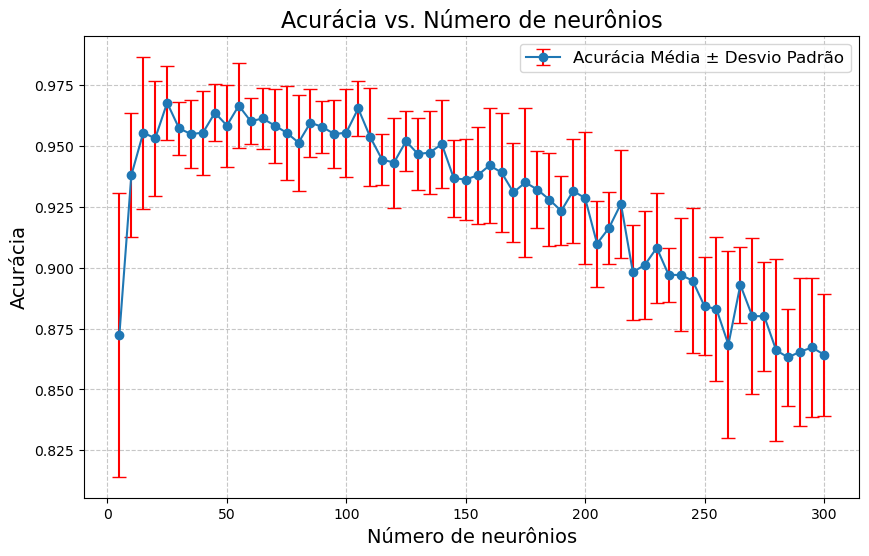

In [9]:
plt.figure(figsize=(10, 6))
plt.errorbar(neurons, avg_accuracies, yerr=std_accuracies, fmt='o-', capsize=5, label="Acurácia Média ± Desvio Padrão", ecolor='red')
plt.title("Acurácia vs. Número de neurônios", fontsize=16)
plt.xlabel("Número de neurônios", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [10]:
from sklearn.linear_model import Perceptron

perceptron_accuracies = []

for i in range(0,10):
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    perceptron_accuracies.append(accuracy)

In [11]:
perceptron_avg_accuracy = statistics.mean(accuracies)
perceptron_std_dev = statistics.stdev(accuracies)

In [12]:
perceptron_avg_accuracy

0.8643274853801169

In [13]:
perceptron_std_dev

0.025084924666113707